In [1]:
import proplot as pplt
from glob import glob 
import pandas as pd
import numpy as np
from textwrap import wrap
from datetime import datetime
from pathlib import Path
import xarray as xr 
import os 


ModuleNotFoundError: No module named 'proplot'

In [3]:
path = '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/*'
nc_files = glob(path)
nc_files.sort()


['/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0601_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0601_mrr2c.nc_2.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0602_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0602_mrr2c.nc_2.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0603_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0603_mrr2c.nc_2.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0604_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0604_mrr2c.nc_2.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0605_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0605_mrr2c.nc_2.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0606_mrr2c.nc_1.nc',
 '/mnt/beegfs/home/rvalenzuela/ESciences/data/MRR/NetCDF/202406/0

In [6]:
ds1 = xr.open_dataset(nc_files[16])
ds2 = xr.open_dataset(nc_files[17])

/mnt/beegfs/home/rvalenzuela/micromamba/envs/pybase/lib/python3.10/site-packages/proplot/axes/plot.py:1275: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  obj = getattr(super(), name)(*args, **kwargs)
/mnt/beegfs/home/rvalenzuela/micromamba/envs/pybase/lib/python3.10/site-packages/proplot/axes/plot.py:1275: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  obj = getattr(super(), name)(*args, **kwargs)


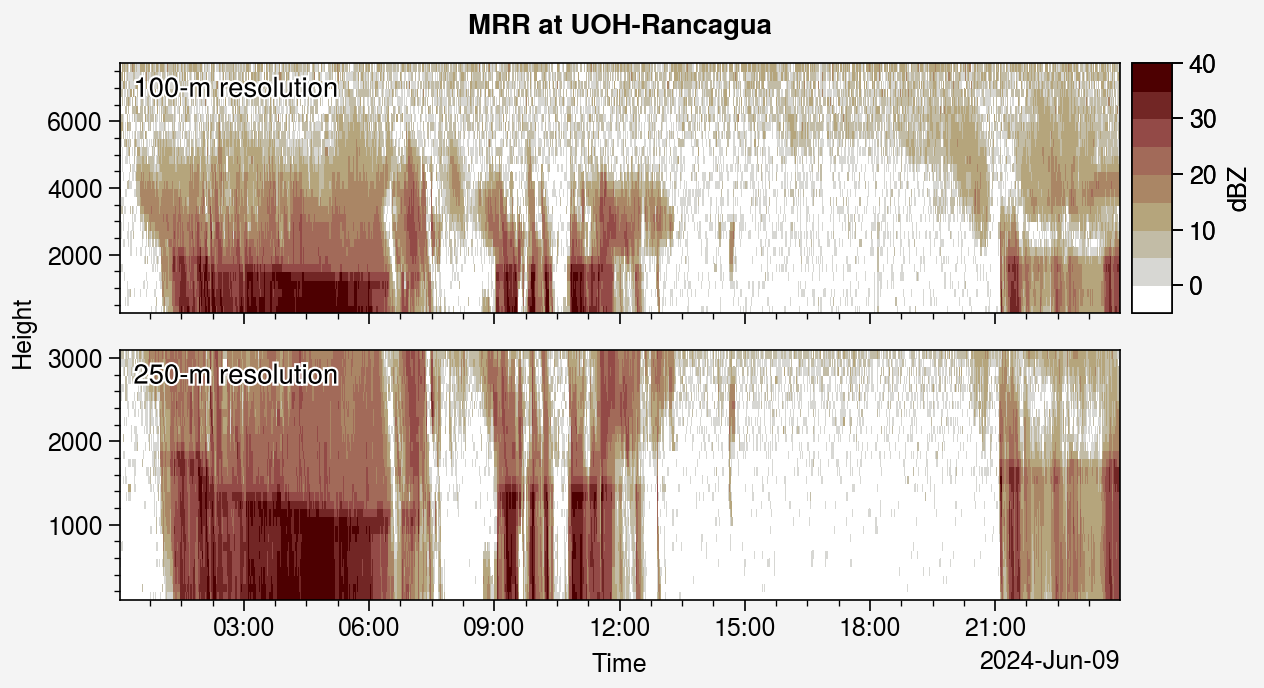

In [7]:
fig, ax = pplt.subplots(nrows=2,refwidth=5,refaspect=4)

cmap = 'bilbao'
vmin, vmax = -5, 40
var_name = 'attenuated_radar_reflectivity'
h0 = ax[0].pcolormesh(ds1.time, ds1['height'][0,:], ds1[var_name].T, vmin=vmin, vmax=vmax, cmap=cmap)
h1 = ax[1].pcolormesh(ds2.time, ds2['height'][0,:], ds2[var_name].T, vmin=vmin, vmax=vmax, cmap=cmap)

ax[0].colorbar(h0,label='dBZ')

ax[0].format(ultitle='100-m resolution')
ax[1].format(ultitle='250-m resolution')

suptitle = 'MRR at UOH-Rancagua'
# suptitle = 'MRR at UdeC-Concepcion'

ax.format(suptitle=suptitle,
          xformatter='concise',
          xrotation=False,
          xlabel='Time',
          ylabel='Height',
          )

In [3]:
import os
print(os.getcwd())


c:\Users\seong jin\Desktop\UOH\Proyecto de software\WebRadar\WR_backendAPI\api\scripts


In [12]:
import plotly.graph_objects as go
from glob import glob
import xarray as xr
import os
from django.conf import settings  # Para usar BASE_DIR
from pathlib import Path  # Importa Path para manejar las rutas

def generar_grafico_interactivo():
    # Usa BASE_DIR para definir rutas relativas dentro del proyecto
    netcdf_path = settings.BASE_DIR / 'api' / 'source' / 'NetCDF' / '202403' / '*.nc'
    output_json_path = settings.BASE_DIR / 'api' / 'source' / 'imagenes_generadas' / 'imagen_interactiva.json'

    # Verifica que las rutas sean correctas
    print(f"Ruta de NetCDF: {netcdf_path}")
    print(f"Ruta de salida: {output_json_path}")

    # Encuentra los archivos NetCDF usando str() para convertir la ruta en cadena de texto
    nc_files = glob(str(netcdf_path))
    nc_files.sort()

    # Asegúrate de que tienes suficientes archivos en la lista
    if len(nc_files) < 18:
        raise ValueError("No hay suficientes archivos NetCDF en el directorio")

    # Abre los datasets correspondientes
    ds1 = xr.open_dataset(nc_files[16])
    ds2 = xr.open_dataset(nc_files[17])

    # Crea la figura interactiva usando Plotly
    fig = go.Figure()

    # Primer gráfico (100-m resolution)
    fig.add_trace(go.Heatmap(
        x=ds1.time, 
        y=ds1['height'][0,:], 
        z=ds1['attenuated_radar_reflectivity'].T, 
        colorscale='Viridis',
        zmin=-5, zmax=40,
        colorbar=dict(title="dBZ")
    ))

    # Segundo gráfico (250-m resolution)
    fig.add_trace(go.Heatmap(
        x=ds2.time, 
        y=ds2['height'][0,:], 
        z=ds2['attenuated_radar_reflectivity'].T, 
        colorscale='Viridis',
        zmin=-5, zmax=40
    ))

    # Configura el diseño
    fig.update_layout(
        title='MRR at UOH-Rancagua',
        xaxis_title='Time',
        yaxis_title='Height'
    )

    # Crear el directorio si no existe
    if not os.path.exists(output_json_path.parent):  # Usar .parent para obtener la carpeta
        os.makedirs(output_json_path.parent)

    # Guarda el gráfico en un archivo JSON
    fig.write_json(str(output_json_path))  # Convierte la ruta a cadena de texto con str()

    return output_json_path
